# Exercices 3

[Télécharger l'exercice](../03_exercice.zip)

# Tutorial 1: Se familiariser avec la discrétisation spatiale

Pour résoudre une équation en 1D (par exemple, une équation de diffusion), il est nécessaire de discrétiser l'espace, c'est-à-dire de diviser le domaine spatial de modélisation en intervalles avec un ensemble de points où la solution sera calculée. Par exemple, si notre domaine est l'intervalle $[0, 1]$, nous définissons $x_0 = 0$, $x_1 = 0.1$, $x_2 = 0.2$, ..., $x_{10} = 1$, avec une longueur d'intervalle $dx = 0.1$.

Dans l'example suivant, nous discrétisons l'intervalle $[a,b]$ en $nx$ morceaux: $x_0$ -- $x_1$ -- $x_2$ -- ... -- ... -- ... -- ... -- $x_{nx-2}$ -- $x_{nx-1}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 1
nx = 101                            
x  = np.linspace(a, b, nx)  
dx = (b-a)/(nx-1)

print('Le vecteur des coordonééer de la discretisation est :', x)
print('Sa longueur est :', len(x))
print('La valeur de dx est :', dx)

Le vecteur des coordonééer de la discretisation est : [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
Sa longueur est : 101
La valeur de dx est : 0.01


Maintenant que notre domaine est discrétisé, nous pouvons initialiser une fonction (comme une concentration ou une température) sur ce domaine. Par exemple, nous pouvons initialiser une température égale à 2 partout :

In [2]:
T = np.ones(nx)*2

Nous pouvons vérifier en traçant la fonction T(x) que nous l'avons bien initialisée :

([<matplotlib.lines.Line2D at 0x7514975346a0>],
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'T'))

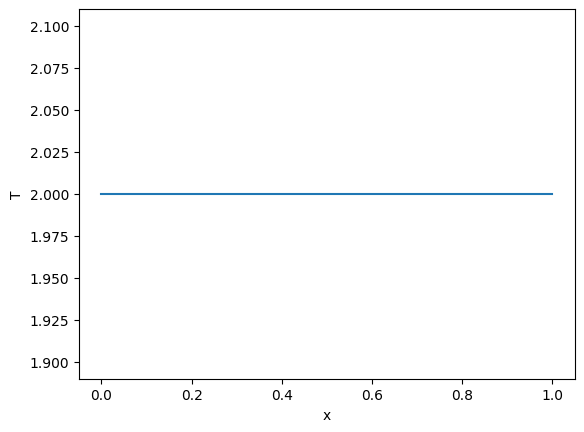

In [3]:

plt.plot(x, T) , plt.xlabel('x') , plt.ylabel('T')

Il est possible de modifier la valeur de T en un point donné en utilisant la syntaxe suivante :

In [4]:
T[0]  = 0             # modification de la valeur de la première composante (cad quand x=a)
T[-1] = 5             # modification de la valeur de la dernière composante (cad quand x=b)
T[int(nx/5):int(2*nx/5)] = -1 # modification de la valeur de la composante entre le premier et le deuxième cinquième du domaine

Affichons à nouveau la fonction $T$ pour voir les effets des changements :

([<matplotlib.lines.Line2D at 0x7514971ae530>],
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'T'))

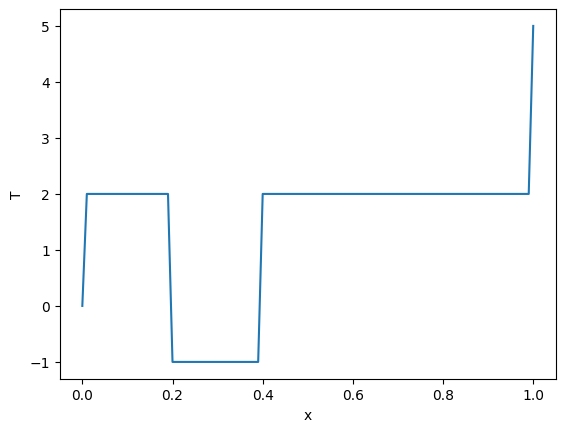

In [5]:
plt.plot(x, T) , plt.xlabel('x') , plt.ylabel('T')

Nous avons vu au point précédent comment changer la valeur de T à un point donné. Souvent, il est demandé de le faire à un point physique. Par exemple, on souhaite donner à la température T la valeur $6$ au point $x_P = 0.4$. Cependant, il n'est pas correct de faire `T[0.4] = 6`, car `T` est un vecteur de $n_x$ éléments et il ne prend que des indices entiers comme arguments. 

Il faut donc trouver l'indice correspondant à $x_P = 0.4$ (ou celui qui s'en approche le plus), car il n'est pas garanti que $x_P = 0.4$ soit atteint dans notre discrétisation $x_0$, $x_1$, $x_2$, ..., $x_{n_x - 2}$, $x_{n_x - 1}$. Pour cela, nous devons diviser la position du point $x_P$ par la longueur de l'intervalle $dx$ pour obtenir sa position relative au début de l'intervalle. Ensuite, nous prenons la partie entière de ce résultat pour nous assurer que l'indice obtenu est un entier : `ixp = int((x_P - a) / dx)`. 

Voici le code complet ainsi qu'un graphique pour vérifier que la valeur a bien été changée :


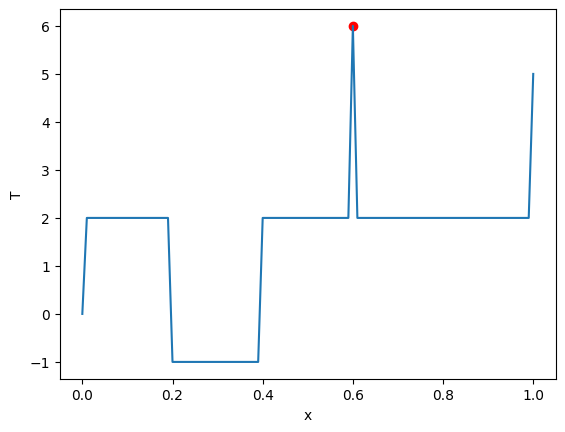

In [6]:
Txp = 6   
xp = 0.6
ixp = int((xp-a)/dx) # indice de la composante la plus proche de xp
T[ixp] = Txp         # modification de la valeur de la composante la plus proche de xp
plt.plot(x, T) , plt.xlabel('x') , plt.ylabel('T') # affichage du vecteur T
plt.scatter(xp, Txp, color='red') # affichage du point rouge pour le nouveau point

En utilisant la même stratégie, nous pouvons appliquer cela sur un intervalle (ici, nous forçons la température à valoir 1 entre $x$ = 0.1 et $x$ = 0.9) :

In [ ]:
Txp = 1  
xl = 0.1
xr = 0.9
ixl = int((xl-a)/dx) 
ixr = int((xr-a)/dx) 
T[ixl:ixr] = Txp     
plt.plot(x, T) , plt.xlabel('x') , plt.ylabel('T') # affichage du vecteur T

Notons qu'il est possible (et parfois préférable) d'obtenir le même résultat que `T[ixl,ixr]` avec avec `T[(xl<x)&(x<xr)] = Txp`. Avec cette derniere commande et `x` étant le vecteur de coordonnés défini ci-dessus, `(xl<x)&(x<xr)` trouve les indices du vecteur dont les coordonées sont compris entre `xl` et `xr`, il est ainsi plus facile d'attribuer une valeur choisie `Txp` aux éléments du vecteur `T` qui satisfassent cette condition. Ainsi la comande suivante est équivalente à celle du code précédent:

In [ ]:
T[(xl<x)&(x<xr)] = Txp      

Il est possible de tester si la température T au point `vc` est égale à `va` avec la commande `T[int((xc - a)/dx)] == va` :

In [ ]:
xc = 0.3 ; va = 1 ; print('La température en x=' + str(xc) + ' est equal à ' + str(va) + ' :', T[int((xc-a)/dx)]==va)
xc = 0.0 ; va = 3 ; print('La température en x=' + str(xc) + ' est equal à ' + str(va) + ' :', T[int((xc-a)/dx)]==va)
xc = 0.0 ; va = 0 ; print('La température en x=' + str(xc) + ' est equal à ' + str(va) + ' :', T[int((xc-a)/dx)]==va)
xc = 0.8 ; va = 0 ; print('La température en x=' + str(xc) + ' est equal à ' + str(va) + ' :', T[int((xc-a)/dx)]==va)

Il sera parfois nécessaire de calculer des valeurs entre les nœuds de discrétisation. Cela peut se faire en faisant une moyenne entre deux points successifs. Notons qu'en faisant cela, nous avons perdu une cellule ; le vecteur est maintenant de dimension $n_x - 1$.

In [ ]:
Tmid = (T[1:]+T[:-1])/2 # calcul de la valeur de la température au milieu de chaque intervalle (taille nx-1)
xmid = (x[1:]+x[:-1])/2 # calcul de la valeur de la position au milieu de chaque intervalle (taille nx-1)

print("Coordonnées des points au milieu de chaque intervalle :")
print(xmid)
print("Valeurs de la température au milieu de chaque intervalle :")
print(Tmid)

# Exercice 2: La trajectoire d’une bombe volcanique

Le but de l'exercice est de simuler la trajectoire d'une bombe volcanique éjectée lors d'une éruption en discrétisant et résolvant les équations de la dynamique en 2D. La bombe commence son parcours à la position $(x_0,y_0)=(0,480)$ m. La vitesse d'éjection est 120 m/s et l'angle de portée est de 60°. La bombe heurte le sol à une altitude de 0 m. Complétez l'ébauche de code, et faite le tourner. Quelle est l'altitude de la bombe volcanique à une distance d'environ 900 m de son origine?

```python
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# parametres physiques
Xb_ini = ... # x initial location
Yb_ini = ... # y initial location
V      = ... # velocity of ejection
alpha  = ... # vertical angle of ejection
g      = ... # gravity accel.
ttot   = ... # total time
Vx     = ... # horizontal velocity
Vy_i   = ... # vertical velocity

# parametres numeriques
dt     = ...  # time step
nt     = ...  # total number of time steps
 
# Initialisation
time  = 0
Xbomb = ...
Ybomb = ...
Vy    = ...

flag = 0

# create the figure outside the loop 
fig, ax = plt.subplots()
 
# time loop
for it in range(1, nt):
    time += dt    # update time
    Vy   += ...   # update y velocity
    Xbomb += ...   # update x position
    Ybomb += ...   # update y position
 
    # vizualization (each 5 iterations)
    if it%5==0:
        clear_output(wait=True)  # clear the output in VS Code
        ax.scatter(Xbomb, Ybomb,c='k')
        ax.set_xlabel('horizontal distance, m')
        ax.set_ylabel('elevation, m') 
        display(fig)
        plt.pause(0.1)  # pause to visualize updates
 
    if Ybomb <= 0: # if the bomb gets at least to y=0 
        break          # or lower, exit the loop
```

### ✅ **À vous de faire !**

Notons que nous pourrions résoudre la trajectoire de la bombe volcanique analytiquement :

$$\begin{align*}
x(t) &= x_0 + v_{\text{inj}} \cos(\alpha) t \\
y(t) &= y_0 + v_{\text{inj}} \sin(\alpha) t - g t^2
\end{align*}$$

$$\text{ou } (x_0, y_0) = (0, 480), \ \alpha = 60^\circ, \ v_{\text{inj}} = 120 \ \text{m/s}$$

# Exercice 3: La trajectoire de plusieurs bombes volcaniques

Cet exercice se base sur l'exercice précédent. Le but est de modéliser plusieurs bombes lancées avec des angles de projection différents, et de sauvegarder les résultats en mémoire pour afficher les figures en "post-processing". Commencez par reprendre le dernier code que vous modifierez ici. En vous basant sur la fonction `np.random.randn`, vous allez créer une population de cinq bombes (nb = 5) représentative d’une éruption volcanique. Pour cela, vous allez randomiser l’angle d’éjection des projectiles et utiliser deux boucles.

## 3.1 Traçage en temps réel

Pour commencer, supposons que seul l'angle d'éjection des projectiles change d'une bombe à l'autre. Vous pouvez alors utiliser un générateur de nombres aléatoires avec une distribution normale (`randn`) ayant une moyenne de 90° et un écart-type de 30° pour construire un vecteur contenant `nb` angles d'éjection.

Maintenant, vous devez modifier les dimensions des variables de la semaine dernière pour en faire des matrices de taille (nombre de bombes × nombre de pas de temps) afin d'y stocker les trajectoires individuelles des différentes bombes (les stocker sera utile pour la question 2.2) :


```python
# Initialisation des paramètres
nb = 5  # nombre de bombes
nt = 100  # nombre de pas de temps, par exemple
Xbomb = np.zeros((nb, nt))  # position x aux nt pas de temps pour nb bombes
Ybomb = np.zeros((nb, nt))  # position y aux nt pas de temps pour nb bombes 
```
Pour initialiser les matrices des coordonnées des projectiles, vous pouvez procéder comme avec des vecteurs simples et modifier toutes les colonnes de la même ligne en utilisant `:` comme cela:
```python
Xbomb[:, 0] = Xb_ini
Ybomb[:, 0] = Yb_ini
```

La boucle temps établie la semaine précédente sera nichée au sein d'une boucle supplémentaire qui itérera sur le nombre de projectile: 
```python
# create the figure outside the loop 
fig, ax = plt.subplots()

for ib in range(nb):        # bomb loop
    for it in range(1, nt): # time loop
        Vy[ib] -= ...
        Xbomb[ib, it] = ... # update x-position
        Ybomb[ib, it] = ... # update y-position

        if it%3==0:
            clear_output(wait=True)  # clear the output in VS Code
            ax.scatter(Xbomb[ib, it], Ybomb[ib, it], c=col[ib])
            ax.set_xlabel('horizontal distance, m')
            ax.set_ylabel('elevation, m')
            display(fig)
            plt.pause(0.1)  # pause to visualize updates
            
        if ...:  # break the loop if bomb reaches a negative altitude
            break
```
Les positions successives des 5 bombes au cours du temps devraient être tracées dans votre figure.

### ✅ **À vous de faire !** 

## 3.2 Post-processing


Dans cette deuxième partie, les trajectoires des bombes seront tracées après l'exécution des boucles à partir des matrices `Xbomb` et `Ybomb` ou elles ont été sauvées. Cela permet de rendre la visualisation bien plus rapide avec l'ébauche de code suivante pour tracer successivement les trajectoires individuelles: 

```python
# plotting en post-processing
plt.figure(3)
plt.clf() 
for ib in range(nb):
    I = ...
    plt.plot(Xbomb[ib, I], Ybomb[ib, I], c=col[ib])
plt.xlabel('horizontal distance, m')
plt.ylabel('elevation, m')
```

Puisque les vecteurs `Xbomb` et `Ybomb` se terminent avec des 0 (à cause de l'interruption de la boucle par `break`), les trajectoires tracées ci-dessus se terminent en faisceau à la position (0,0). Il faut donc ajouter une condition à cette commande `plt.plot` afin d'omettre les (0,0). Le symbole `:` pour l'indice des colonnes dans la commande `plt.plot(Xbomb[ib, :], Ybomb[ib,:])` indique que tous les pas de temps sont considérés. En utilisant le concept de l'exercice 2, vous pouvez remplacer le symbole `:` par une expression de type `I = (Ybomb[ib, :]==x)` et alors seules les paires de valeurs `Xbomb[ib,it]` et `Ybomb[ib,it]` où `Ybomb[ib,it]` est égal à `x` seront tracées. Complétez le code ci-dessus pour ne tracer que les paires de coordonnées ou `Ybomb` est strictement supérieur à 0.

### ✅ **À vous de faire !** 
